## The Goal of the Project

This project focuses on predicting the prices of real estate based on various features such as the number of bathrooms, the location of the property, the total square meter area, the number of balconies, the number of bedrooms etc. By analyzing and processing the dataset of real estate postings, I was able to engineer features and train a machine learning model to predict prices with high accuracy.

I started by performing exploratory data analysis to understand the distribution of each feature and identify any potential outliers or missing values. I then used various techniques such as feature scaling and one-hot encoding to prepare the data for machine learning algorithms.

Next, I trained a linear regression model on the preprocessed data and evaluated its performance using metrics such as and R-squared. I also utilized cross-validation to ensure that the model's performance was consistent across different subsets of the data.

Finally, I created a function to predict real estate prices based on user input for various features such as availability, bath, balcony, bedroom_num, total_m2 and location.

Overall, this project demonstrates the application of machine learning techniques for real estate price prediction and highlights the importance of data preprocessing, feature engineering, and model selection for accurate and reliable predictions.

## Import the Libraries

In [132]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [133]:
data = pd.read_csv("./data/data.csv") # load the data

## Data Cleaning

In [134]:
data["price_eur"] = data["price"]*0.011 # in order to represent the value in EUR and
data["bedroom_num"] = data["size"].str.extract('(\d+)').astype(float) # extract only numbers of bedrooms with help of a regular expression
data = data.drop(["price", "society", "area_type", "size"], axis=1) # we delete the columns which we don't need
df1 = data





***First we will try to handle the missing values by mean imputation***

In [135]:
df1.isnull().sum()
balcony_mean = df1["balcony"].mean() # we take a mean of balcony column
bath_mean = df1["bath"].mean() # we take a mean of bath column
bedroom_num_mean = df1["bedroom_num"].mean() # we take a mean of bedroom column
df1["balcony"] = df1["balcony"].fillna(balcony_mean) # we apply the mean to fill the missing values
df1["bath"] = df1["bath"].fillna(bath_mean) # we apply the mean to fill the missing values
df1["bedroom_num"] = df1["bedroom_num"].fillna(bedroom_num_mean) # we apply the mean to fill the missing values
df1 = df1.dropna() # we delete the rest of the raws which contain missing values
df1.isnull().sum() # we check if there is more missing values
df1

,availability,location,total_sqft,bath,balcony,price_eur,bedroom_num
0,19-Dec,Electronic City Phase II,1056,2.0,1.000000,0.42977,2.0
1,Ready To Move,Chikka Tirupathi,2600,5.0,3.000000,1.32000,4.0
2,Ready To Move,Uttarahalli,1440,2.0,3.000000,0.68200,3.0
3,Ready To Move,Lingadheeranahalli,1521,3.0,1.000000,1.04500,3.0
4,Ready To Move,Kothanur,1200,2.0,1.000000,0.56100,2.0
...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,3453,4.0,0.000000,2.54100,5.0
13316,Ready To Move,Richards Town,3600,5.0,1.584376,4.40000,4.0
13317,Ready To Move,Raja Rajeshwari Nagar,1141,2.0,1.000000,0.66000,2.0
13318,18-Jun,Padmanabhanagar,4689,4.0,1.000000,5.36800,4.0


In [136]:
def convertstr(x): # this function will go through the column and try to convert the values to floats
    try:           # since some values have the following format (1023 - 1232), the following function is applied
        return float(x)
    except:
        try:
            return (float(x.split(" - ")[0]) + float(x.split(" - ")[1])) / 2
        except:
            return np.nan

In [137]:
df1.loc[:, "total_sqft"] = df1["total_sqft"].apply(convertstr).copy() # we apply the function
df1 = df1.dropna() # and we drop again the null values since we generated some more of them through the function


/var/folders/pk/bg9zd87j5w10vzj3kf03_jy40000gn/T/ipykernel_40487/3898913278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, "total_sqft"] = df1["total_sqft"].apply(convertstr).copy() # we apply the function


## Feature Engineering

In [138]:
df1.loc[:, "availability"] = df1["availability"].apply(lambda x: 1 if x=="Ready To Move" else 0) # we transform the values to 1 or 0


/var/folders/pk/bg9zd87j5w10vzj3kf03_jy40000gn/T/ipykernel_40487/3114908147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, "availability"] = df1["availability"].apply(lambda x: 1 if x=="Ready To Move" else 0) # we transform the values to 1 or 0


***Now I want to handle our categorical column which is called "location"***

In [139]:
df1["location"] = df1["location"].apply(lambda x: x.strip()) # we remove white spaces from beginnings and ends of locations
location_count = df1.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_less50 = location_count[location_count<50]
df1["location"] = df1["location"].apply(lambda x: "other" if x in location_less50 else x)
df1["total_m2"] = df1["total_sqft"]*0.092903
df1["price_per_m2"] = df1["price_eur"]*100000 / df1["total_m2"]
df1.drop("total_sqft", axis=1, inplace=True)
df1.loc[:, "price_eur"] = df1["price_eur"]*100000

/var/folders/pk/bg9zd87j5w10vzj3kf03_jy40000gn/T/ipykernel_40487/975822083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["location"] = df1["location"].apply(lambda x: x.strip()) # we remove white spaces from beginnings and ends of locations
/var/folders/pk/bg9zd87j5w10vzj3kf03_jy40000gn/T/ipykernel_40487/975822083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["location"] = df1["location"].apply(lambda x: "other" if x in location_less50 else x)
/var/folders/pk/bg9zd87j5w10vzj3kf03_jy40000

## Outliers detection

In [140]:
df1[df1["total_m2"]/df1["bedroom_num"]<10] # the following data points are data errors

,availability,location,bath,balcony,price_eur,bedroom_num,total_m2,price_per_m2
45,1,HSR Layout,9.0,1.584376,220000.0,8.0,55.741800,3946.768852
349,0,other,3.0,2.000000,81400.0,3.0,1.021933,79652.971379
482,1,other,3.0,2.000000,71500.0,5.0,46.451500,1539.239852
770,1,other,9.0,3.000000,209000.0,9.0,55.741800,3749.430409
789,1,other,4.0,3.000000,71500.0,6.0,55.741800,1282.699877
...,...,...,...,...,...,...,...,...
12011,1,other,8.0,1.584376,154000.0,8.0,74.322400,2072.053647
12067,1,other,5.0,1.000000,66000.0,8.0,71.721116,920.231080
12464,1,other,3.0,1.000000,49500.0,4.0,32.516050,1522.325129
12942,1,other,3.0,3.000000,85800.0,6.0,58.064375,1477.670258


In [141]:
df1 = df1[~(df1.total_m2 / df1.bedroom_num<10)] # the data errors are removed

In [142]:
df1["price_per_m2"].describe() # let's see the range of the price_per_m2

count    13208.000000
mean       786.565343
std        530.590203
min         31.711871
25%        504.626608
50%        641.349938
75%        860.236983
max      20894.658629
Name: price_per_m2, dtype: float64

***We can see that our column "price_per_m2" has outliers up to 20894.66 and down to 31.711. We want to remove them***

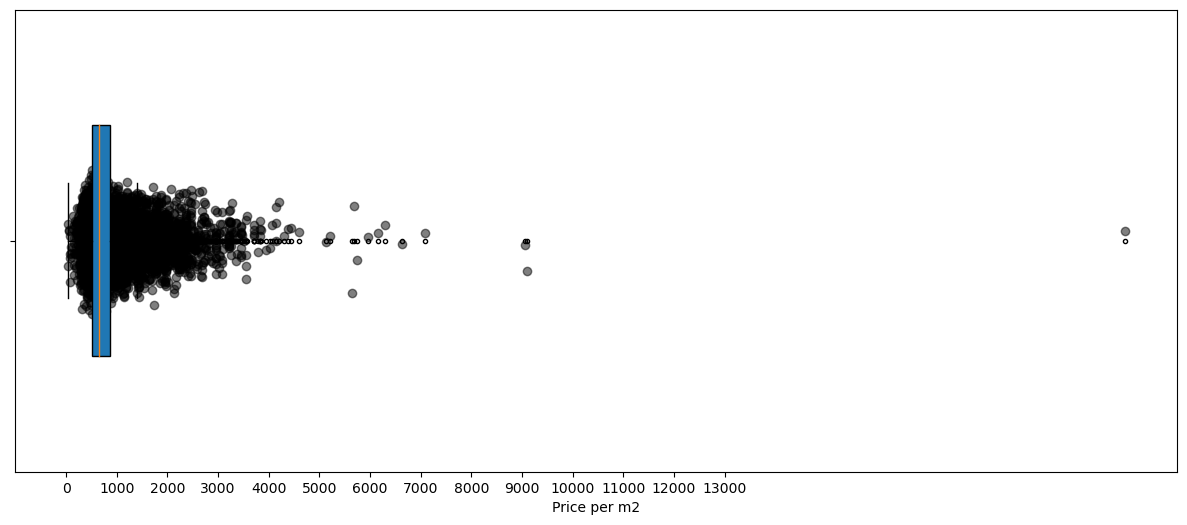

In [143]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.boxplot(df1['price_per_m2'], sym='.', vert=False, whis=1.5, widths=0.5, patch_artist=True)
ax.scatter(df1['price_per_m2'], np.random.normal(1, 0.04, size=len(df1['price_per_m2'])), alpha=0.5, color='black')
ax.set_xticks(range(0, len(df1['price_per_m2']), 1000))
ax.set_xlabel('Price per m2')
ax.set_yticklabels('')
plt.show()

In [144]:
q1 = df1['price_per_m2'].quantile(0.25) # define the first quartile
q3 = df1['price_per_m2'].quantile(0.75) # define the third quartile
iqr = q3 - q1 
treshhold_low = q1 - iqr*0.5  # based on the boxplot I intuitively determine the low treshhold
treshhold_high = q3 + iqr*3 # based on the boxplot I intuitively determine the high treshhold
acceptable_values = (df1["price_per_m2"]>= treshhold_low) & (df1["price_per_m2"]<=treshhold_high) # we determine the acceptable
                                                                                                  # which should be in our df
df1 = df1[acceptable_values]
df1.shape

(12444, 8)

Text(0, 0.5, 'Counts')

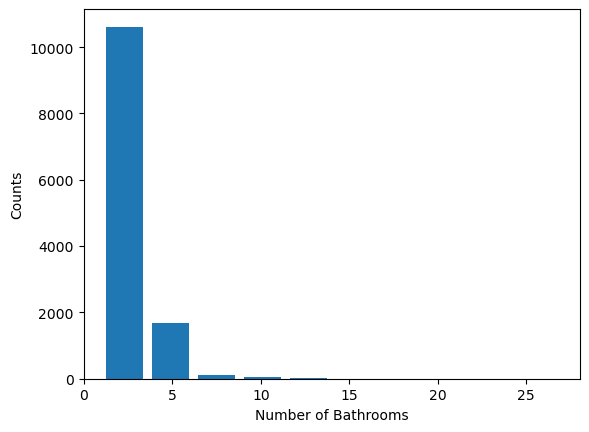

In [145]:
plt.hist(df1.bath, rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Counts")

In [146]:
df1[df1.bath>df1.bedroom_num+2] # let's see if there are real estate objects which have an unusually high amount of bathrooms

,availability,location,bath,balcony,price_eur,bedroom_num,total_m2,price_per_m2
1078,1,other,14.0,1.584376,550000.0,9.0,306.579900,1793.985842
1953,1,KR Puram,12.0,1.584376,121000.0,8.0,111.483600,1085.361434
1979,1,other,12.0,0.000000,132000.0,8.0,91.973970,1435.188673
2620,1,other,9.0,1.000000,1100000.0,6.0,1053.334214,1044.302924
7709,1,other,7.0,2.000000,88000.0,4.0,228.541380,385.050620
8106,1,other,12.0,1.584376,330000.0,8.0,171.870550,1920.049712
9990,1,other,9.0,3.000000,134200.0,6.0,111.483600,1203.764500
10695,0,Electronic City,13.0,1.584376,165000.0,9.0,111.483600,1480.038320
11366,1,other,8.0,1.584376,495000.0,4.0,650.321000,761.162564
11645,1,other,9.0,3.000000,253000.0,6.0,139.354500,1815.513672


In [147]:
df1 = df1[~(df1.bath>df1.bedroom_num+2)]
df1.drop("price_per_m2", axis=1, inplace=True) # drop those data errors

## One hot encoding

In [148]:
one_hot_location = pd.get_dummies(df1.location)
df1 = pd.concat([df1, one_hot_location.drop("other", axis=1)], axis=1)
df1.drop("location", axis=1, inplace=True) # Now we have transformed our categorical variables to binary scale

## Machine Learning Model

***Let's first split the data into train and test***

In [149]:
from sklearn.model_selection import train_test_split

X = df1.drop("price_eur", axis=1)
y = df1["price_eur"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


## Linear Regression

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
r2

0.7543657459110832

## Cross-Validation

In [151]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=777)
cross_val_score(lr, X, y, cv=cv)

array([0.77144785, 0.70525914, 0.72758642, 0.68958296, 0.79209367])

## Let's define the function for the model

In [152]:
def predict_price(availability, bath, balcony, bedroom_num, total_m2, location):
    
    loc_index = np.where(X.columns==location)[0][0] # I am doing this because this categorical variable has been transformed with the help of one hot encoding to binary columns
    
    x = np.zeros(len(X.columns)) # create an array with empty values
    x[0] = availability # fill the empty array
    x[1] = bath
    x[2] = balcony
    x[3] = bedroom_num
    x[4] = total_m2
    if loc_index>= 0:
        x[loc_index] = 1
        
    return print("The Estimated Price of the Property is:", lr.predict([x])[0])


## The function is ready to predict

In [155]:
predict_price(1, 3, 1, 4, 132, "7th Phase JP Nagar")

The Estimated Price of the Property is: 105570.03628759105


/Users/germangnetov/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
